In [1]:
import numpy as np
np.random.seed(2024 - 5 - 11)

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# ___Classification___
-------------------

In [2]:
# First, why do we need specialized algorithms for classification? Cannot we just use the regression models?

In [3]:
tumour_size = np.random.rand(10_000) * 19 # in millimeters

# let's introduce some skew by pushing in some outliers
tumour_size = np.concatenate([tumour_size, np.random.rand(200) * 100])
np.random.shuffle(tumour_size)

In [4]:
tumour_size.min(), tumour_size.max()

(0.0017649209577984548, 99.69043245423353)

In [5]:
# consider tumours larger than 15 mm malignant
is_malignant = (tumour_size > 15).astype(np.int32)

In [6]:
# fraction of tumours that are malignant

is_malignant.mean()

0.21970588235294117

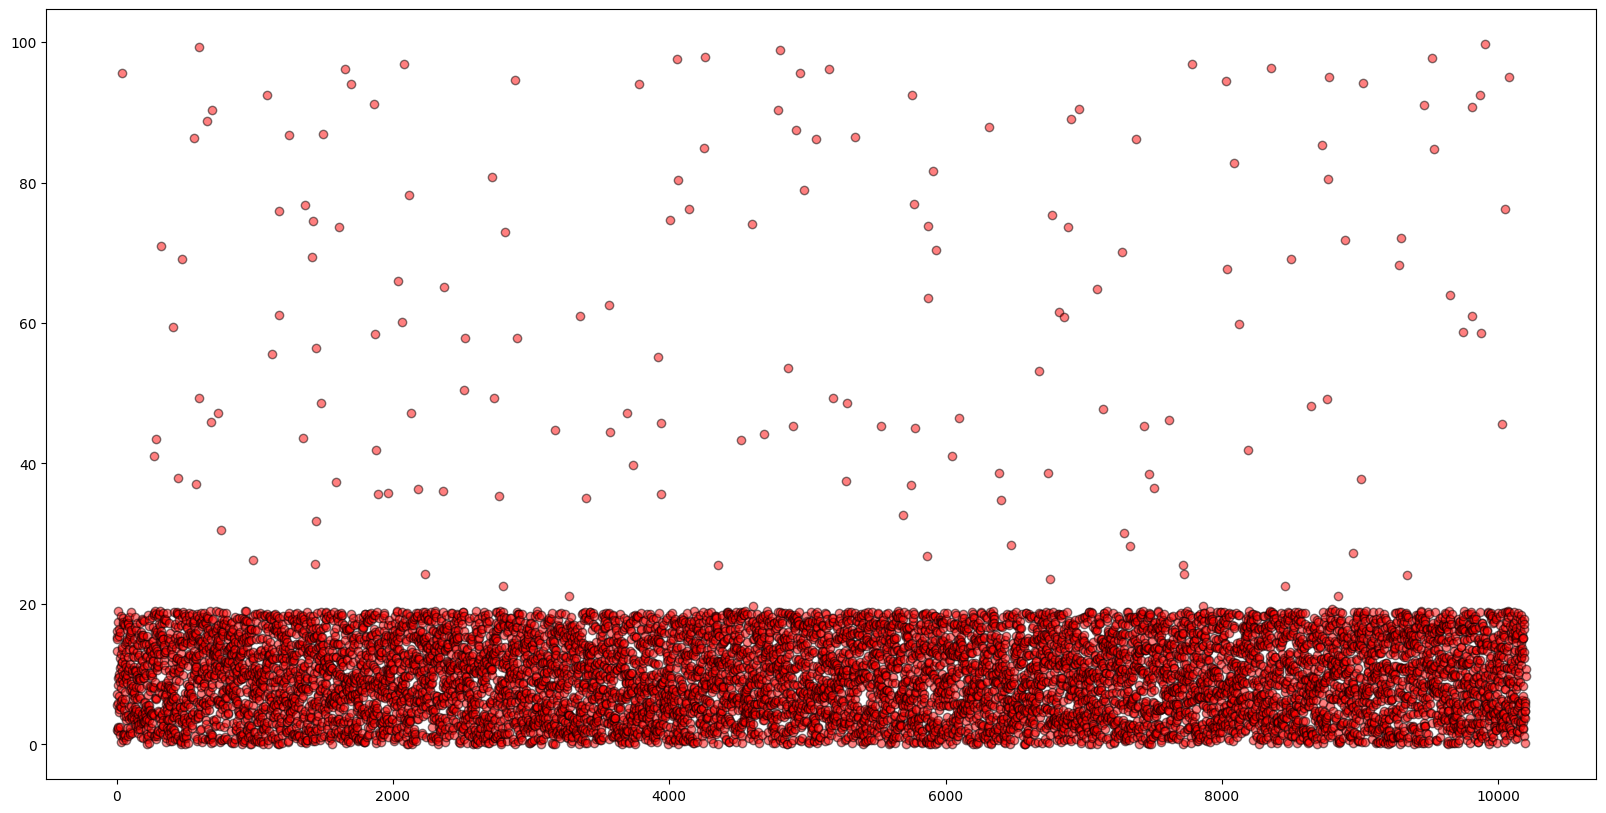

In [7]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
axes.plot(tumour_size, linestyle = "none", marker = 'o', markeredgecolor = "black", markerfacecolor = "red", alpha = 0.5)
plt.show()

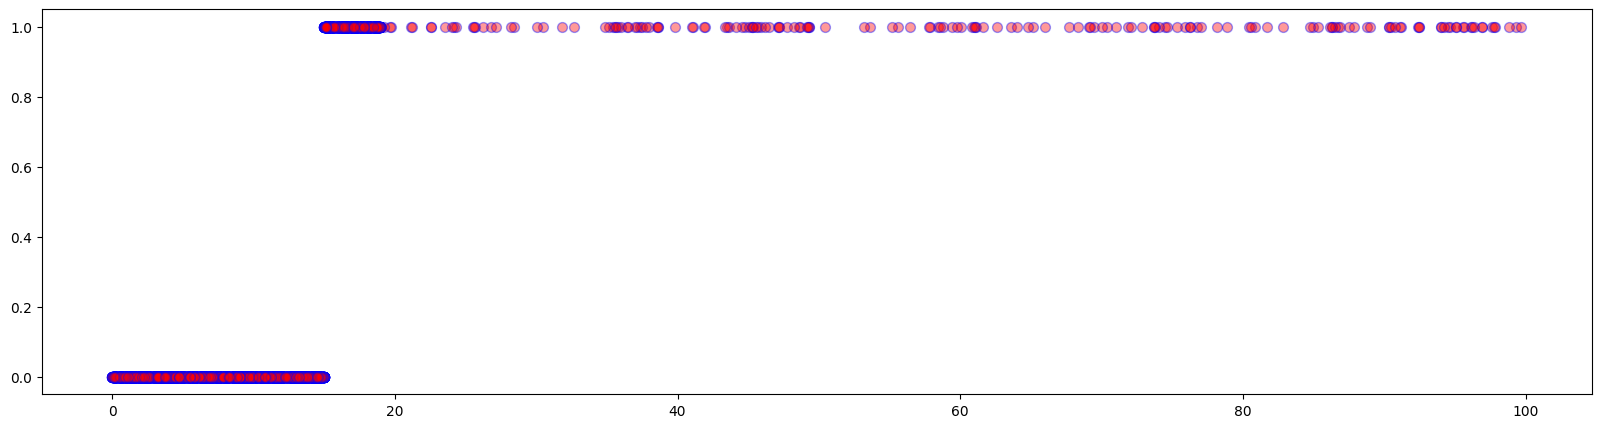

In [8]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
axes.scatter(tumour_size, is_malignant, color = "red", edgecolor = "blue", s = 50, alpha = 0.4)
plt.show()

In [9]:
# if we were to use linear regression,

train_x, test_x, train_y, test_y = train_test_split(tumour_size.reshape(tumour_size.size, 1), is_malignant, train_size = 0.8)
model = LinearRegression(n_jobs = 16)
model.fit(train_x, train_y)

LinearRegression(n_jobs=16)

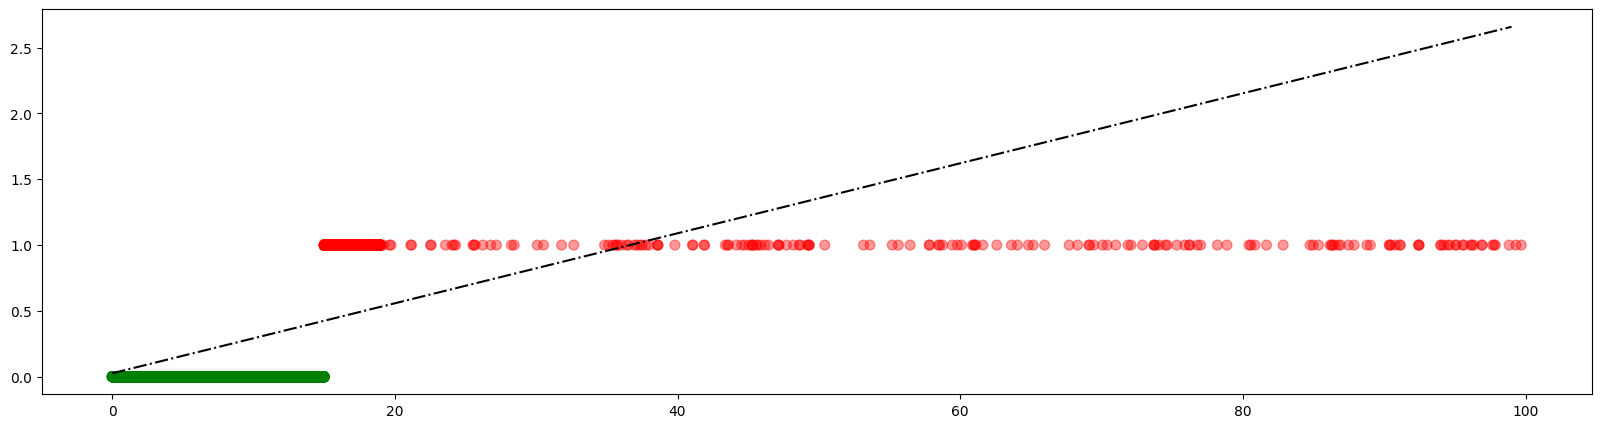

In [11]:
# on a dataset with outliers

fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
axes.scatter(tumour_size, is_malignant, s = 50, alpha = 0.4, c = list(map(lambda x: "red" if x else "green",  is_malignant)))
__x = np.arange(tumour_size.min(), tumour_size.max())
axes.plot(__x, __x * model.coef_ + model.coef_, color = "black", linestyle = "-.")
plt.show()

In [12]:
# if we were to take this line as the classification boundary, all green points will be classified as benign
# about one third of red points will be correctly classified as malignant
# but reds at the extreme right (outliers) will be classified as benign which is incorrect!

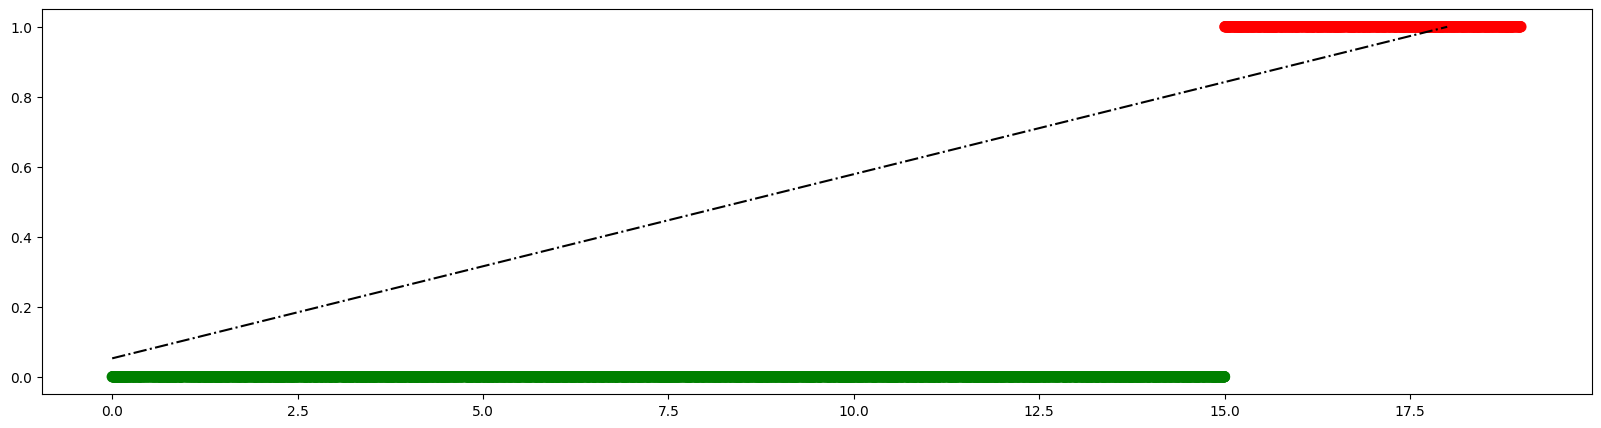

In [14]:
# in a dataset without outliers

tumour_size = np.random.rand(10_000) * 19 # in millimeters
is_malignant = (tumour_size > 15).astype(np.int32)

train_x, test_x, train_y, test_y = train_test_split(tumour_size.reshape(tumour_size.size, 1), is_malignant, train_size = 0.8)
model = LinearRegression(n_jobs = 16)
model.fit(train_x, train_y)

fig, axes = plt.subplots()
fig.set_size_inches(20, 5)
axes.scatter(tumour_size, is_malignant, s = 50, alpha = 0.4, c = list(map(lambda x: "red" if x else "green",  is_malignant)))
__x = np.arange(tumour_size.min(), tumour_size.max())
axes.plot(__x, __x * model.coef_ + model.coef_, color = "black", linestyle = "-.")
plt.show()

In [15]:
# linear regression works way better if the dataset has no outliers as they tend to skew the coefficients
# in this model, only a small fraction of red points will be misclassified!

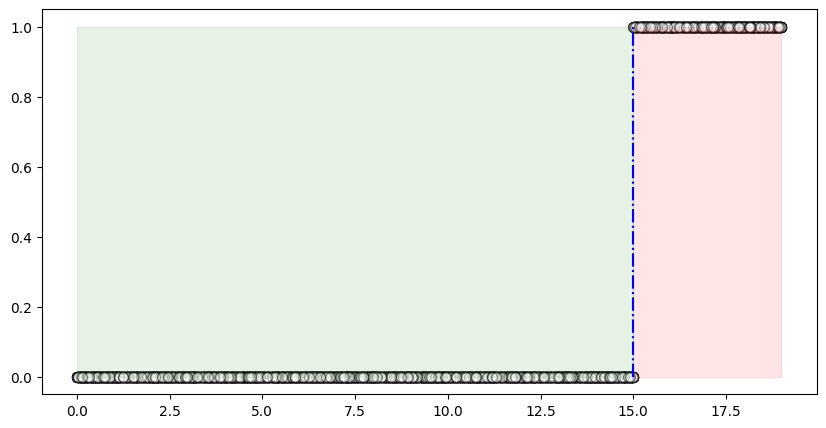

In [16]:
# what we need is a binary classifier and a vertical decision boundary

threshold = 15
tumour_size = np.random.rand(10_000) * 19 # in millimeters
is_malignant = (tumour_size > threshold).astype(np.int32)

train_x, test_x, train_y, test_y = train_test_split(tumour_size.reshape(tumour_size.size, 1), is_malignant, train_size = 0.8)
model = LinearRegression(n_jobs = 16)
model.fit(train_x, train_y)

fig, axes = plt.subplots()
fig.set_size_inches(10, 5)
axes.scatter(tumour_size, is_malignant, s = 50, alpha = 0.5, color = "white", edgecolor = "black")
axes.vlines(x = threshold, ymin = 0, ymax = 1, linestyle = "-.", color = "blue")
axes.fill_between(x = [threshold, tumour_size.max()], y1 = 0, y2 = 1, alpha = 0.1, color = "red")
axes.fill_between(x = [tumour_size.min(), threshold], y1 = 0, y2 = 1, alpha = 0.1, color = "green")
plt.show()